# **Proyecto final**

Curso:          Fundamentos de Programación en Python para Macroeconomía y Finanzas     
Profesor:       Victor Fuentes Campos     

- Fecha y hora de entrega: Jueves 18 de enero, 9:59pm. **NO HABRÁN PRÓRROGAS**
- Grupos de dos personas por elección libre
- Envíe su tarea haciendo el `push` de su código a su repo en GitHub Classroom

El propósito de este proyecto es que tengan un código de su autoría publicado en GitHub

## Página web

Incluya aquí el link de sus páginas web
- Integrante 1: ________________
- Integrante 2: ________________

> Según lo discutido en la última clase, **deberán crear su propia página web usando GitHub Pages**. En ella, deberán mostrar el notebook de su proyecto final

Recursos adicionales:

1. Videos tutoriales
    - https://www.youtube.com/watch?v=zyGfECfJ9BY
    - https://www.youtube.com/watch?v=K5xImVmm2Ds


2. Plantillas
    - https://bootstrapmade.com/bootstrap-portfolio-templates/
    - https://cssauthor.com/free-bootstrap-portfolio-templates/

## Aplicación

Pautas generales

- Insumos: deberán trabajar al menos dos (2) bases de datos diferentes que requieran alguna transformación (`data wrangling`). Una de ellas tiene que ser un archivo de texto (`.txt`, `.pdf`, `.docx`, etc)
- Tareas: (i) explicar la relevancia del análisis a desarrollar; (ii) utilizar al menos una vez listas, loops y functions para transformar la base de datos cruda y obtener información relevanete; y (iii) aplicar algoritmos de NLP para transformar texto en datos valiosos
- Deberán proveer obligatoriamente gráficos (2 o más) y tablas/cuadros (2 o más) de su libre elección y conclusiones relevantes

Posibles datos para el ejercicio de `data wrangling`

- Estadísticas de 100 años del BCRP. Más [aquí](https://www.bcrp.gob.pe/en/estadisticas/estadisticas-de-100-anos-del-bcrp.html)
- 1,000 años de datos macroeconómicos en Reino Unido. Más [aquí](https://www.kaggle.com/datasets/bank-of-england/a-millennium-of-macroeconomic-data)
- Historial crediticio - Datathon Interbank 2020. Más [aquí](https://www.kaggle.com/competitions/interbank20/data?select=censo_test.csv)
- Ataques terroristas en el mundo. Más [aquí](https://www.kaggle.com/code/gpreda/global-terrorist-attacks/input)
- [World Hapiness Report 2023](https://worldhappiness.report/), compilado por Carla Solís. Más [aquí](https://raw.githubusercontent.com/ccsuehara/python_para_las_ccss/main/Clase%205/data/world-happiness-report-2023.csv)
- Otros datos del BCRP, MEF, SBS, SMV, BVL, INEI, etc.
- Cualquier otra base de datos que consideren relevante. En este caso, también deberán proveer la base de datos original en el repo. De ser muy grande, deberá ofrecer un link a la plataforma de almacenamiento en la nuba de su elección (Dropbox, Drive, OneDrive, etc) que permita el acceso a dichos datos


Posibles datos para el ejercicio de NLP

- Federal Open Market Committee (FOMC) meetings statements. Más [aquí](https://www.federalreserve.gov/monetarypolicy/fomccalendars.htm). El repo incluye tres archivos `.docx`
- Programa Monetario del Banco Central de Reserva del Perú (BCRP). Más [aquí](https://www.bcrp.gob.pe/transparencia/actividades-oficiales/notas-informativas.html). El repo incluye tres archivos `.pdf`
- Mensajes presidenciales de Carla Solís y Luis Eduardo San Martín. [Acá](https://github.com/ccsuehara/Peruvian-presidents-speeches/tree/master/data/presidentialSpeechPeru/txt) los archivos
- "Fake vs real news" de George McIntire. Más info [aquí](https://opendatascience.com/how-to-build-a-fake-news-classification-model/). La base de datos está alojada en su [repo](https://github.com/GeorgeMcIntire/fake_real_news_dataset?tab=readme-ov-file)
- Coronavirus tweets de Kaggle. Más info [aquí](https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification)
- Twitter Financial News de Kaggle. Más infor [aquí](https://www.kaggle.com/datasets/sulphatet/twitter-financial-news)
- Cualquier otra base de datos que consideren relevante. En este caso, también deberán proveer la base de datos original en el repo. De ser muy grande, deberá ofrecer un link a la plataforma de almacenamiento en la nuba de su elección (Dropbox, Drive, OneDrive, etc) que permita el acceso a dichos datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import json
import requests

# Primera Parte Del Trabajo: `data wrangling` 


## Descarga de datos desde el API - BCRP.

Descarga de la Tasa de Referencia de Política Monetaria.

In [2]:
# URL de la API para la serie "tasa de referencia" en json
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PD04722MM/json/2003-10/2023-12"

# Realizar la solicitud GET
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    data = response.json()
else:
    print("Error en la solicitud:", response.status_code)

# Convertir los datos a una cadena JSON
datos_json = json.dumps(data, indent=4)

# Ruta del archivo donde se guardará el JSON
ruta_archivo = 'data.json'

# Escribir la cadena JSON en un archivo
with open(ruta_archivo, 'w') as archivo:
    archivo.write(datos_json)

print(f"Archivo JSON '{ruta_archivo}' creado con éxito.")

# Función para convertir JSON a DataFrame:

def convertir_json_a_dataframe(data_json):
    df = pd.DataFrame(data_json['periods'])
    df['name'] = df['name'].str.replace('.', '', regex=False)
    df['name'] = df['name'].replace({'Ene': 'Jan', 'Feb': 'Feb', 'Mar': 'Mar', 'Abr': 'Apr', 'May': 'May', 'Jun': 'Jun',
                                     'Jul': 'Jul', 'Ago': 'Aug', 'Sep': 'Sep', 'Oct': 'Oct', 'Nov': 'Nov', 'Dic': 'Dec'}, regex=True)
    df['fecha'] = pd.to_datetime(df['name'], format='%b%Y')
    df['indice'] = pd.to_numeric(df['values'].str[0])
    df = df.set_index('fecha')
    return df

# Leer datos desde un archivo JSON
with open('data.json', 'r') as file:
    data_json = json.load(file)

# Convertir los datos JSON a DataFrame
df = convertir_json_a_dataframe(data_json)

#df_seleccionado = df.loc[:, ['columna1', 'columna2']]
t_r = df.loc[:, ['indice']]
print(t_r)

Archivo JSON 'data.json' creado con éxito.
            indice
fecha             
2003-10-01    2.75
2003-11-01    2.50
2003-12-01    2.50
2004-01-01    2.50
2004-02-01    2.50
...            ...
2023-08-01    7.75
2023-09-01    7.50
2023-10-01    7.25
2023-11-01    7.00
2023-12-01    6.75

[243 rows x 1 columns]


Descarga del Índice de Precios Al Consumidor (2021 = 100)

In [3]:
# URL de la API para la serie IPC (2021=100) en json
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN38705PM/json/2003-1/2023-12"

# Realizar la solicitud GET
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    IPC = response.json()
else:
    print("Error en la solicitud:", response.status_code)

# Convertir los datos a una cadena JSON
datos_json = json.dumps(IPC, indent=4)

# Ruta del archivo donde se guardará el JSON
ruta_archivo = 'IPC.json'

# Escribir la cadena JSON en un archivo
with open(ruta_archivo, 'w') as archivo:
    archivo.write(datos_json)

print(f"Archivo JSON '{ruta_archivo}' creado con éxito.")

# Función para convertir JSON a DataFrame:

def convertir_json_a_dataframe(IPC_json):
    df = pd.DataFrame(IPC_json['periods'])
    df['name'] = df['name'].str.replace('.', '', regex=False)
    df['name'] = df['name'].replace({'Ene': 'Jan', 'Feb': 'Feb', 'Mar': 'Mar', 'Abr': 'Apr', 'May': 'May', 'Jun': 'Jun',
                                     'Jul': 'Jul', 'Ago': 'Aug', 'Sep': 'Sep', 'Oct': 'Oct', 'Nov': 'Nov', 'Dic': 'Dec'}, regex=True)
    df['fecha'] = pd.to_datetime(df['name'], format='%b%Y')
    df['indice'] = pd.to_numeric(df['values'].str[0])
    df = df.set_index('fecha')
    return df

# Leer datos desde un archivo JSON
with open('IPC.json', 'r') as file:
    IPC_json = json.load(file)

# Convertir los datos JSON a DataFrame
IPC = convertir_json_a_dataframe(IPC_json)

#Seleccionar filas
IPC = IPC.loc[:, ['indice']]
print(IPC)


Archivo JSON 'IPC.json' creado con éxito.
                indice
fecha                 
2003-01-01   57.598612
2003-02-01   57.868648
2003-03-01   58.515493
2003-04-01   58.485733
2003-05-01   58.467003
...                ...
2023-08-01  112.042985
2023-09-01  112.061363
2023-10-01  111.700024
2023-11-01  111.517885
2023-12-01  111.970400

[252 rows x 1 columns]


Descarga del Índice de Precios Al Consumidor sin Alimentos Ni Energía (2021 = 100)

In [4]:
# URL de la API para la serie IPC sin alimentos ni energía (2021=100) en json
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN38707PM/json/2003-1/2023-12"

# Realizar la solicitud GET
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    data = response.json()
else:
    print("Error en la solicitud:", response.status_code)

# Convertir los datos a una cadena JSON
datos_json = json.dumps(data, indent=4)

# Ruta del archivo donde se guardará el JSON
ruta_archivo = 'data.json'

# Escribir la cadena JSON en un archivo
with open(ruta_archivo, 'w') as archivo:
    archivo.write(datos_json)

print(f"Archivo JSON '{ruta_archivo}' creado con éxito.")

# Función para convertir JSON a DataFrame:

def convertir_json_a_dataframe(data_json):
    df = pd.DataFrame(data_json['periods'])
    df['name'] = df['name'].str.replace('.', '', regex=False)
    df['name'] = df['name'].replace({'Ene': 'Jan', 'Feb': 'Feb', 'Mar': 'Mar', 'Abr': 'Apr', 'May': 'May', 'Jun': 'Jun',
                                     'Jul': 'Jul', 'Ago': 'Aug', 'Sep': 'Sep', 'Oct': 'Oct', 'Nov': 'Nov', 'Dic': 'Dec'}, regex=True)
    df['fecha'] = pd.to_datetime(df['name'], format='%b%Y')
    df['indice'] = pd.to_numeric(df['values'].str[0])
    df = df.set_index('fecha')
    return df

# Leer datos desde un archivo JSON
with open('data.json', 'r') as file:
    data_json = json.load(file)

# Convertir los datos JSON a DataFrame
df = convertir_json_a_dataframe(data_json)

#seleccionar variables
IPC_sin_AE = df.loc[:, ['indice']]
print(IPC_sin_AE)


Archivo JSON 'data.json' creado con éxito.
                indice
fecha                 
2003-01-01   65.177038
2003-02-01   65.325737
2003-03-01   66.591954
2003-04-01   66.767796
2003-05-01   66.804922
...                ...
2023-08-01  107.875805
2023-09-01  108.019897
2023-10-01  108.257134
2023-11-01  108.260801
2023-12-01  108.648210

[252 rows x 1 columns]


Descarga de Expectativa de Inflación a 12 meses

In [5]:
# URL de la API para la serie de expectativas inflacionarias en json
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PD12912AM/json/2003-1/2023-12"

# Realizar la solicitud GET
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    data = response.json()
else:
    print("Error en la solicitud:", response.status_code)

# Convertir los datos a una cadena JSON
datos_json = json.dumps(data, indent=4)

# Ruta del archivo donde se guardará el JSON
ruta_archivo = 'data.json'

# Escribir la cadena JSON en un archivo
with open(ruta_archivo, 'w') as archivo:
    archivo.write(datos_json)

print(f"Archivo JSON '{ruta_archivo}' creado con éxito.")

# Función para convertir JSON a DataFrame:

def convertir_json_a_dataframe(data_json):
    df = pd.DataFrame(data_json['periods'])
    df['name'] = df['name'].str.replace('.', '', regex=False)
    df['name'] = df['name'].replace({'Ene': 'Jan', 'Feb': 'Feb', 'Mar': 'Mar', 'Abr': 'Apr', 'May': 'May', 'Jun': 'Jun',
                                     'Jul': 'Jul', 'Ago': 'Aug', 'Sep': 'Sep', 'Oct': 'Oct', 'Nov': 'Nov', 'Dic': 'Dec'}, regex=True)
    df['fecha'] = pd.to_datetime(df['name'], format='%b%Y')
    df['indice'] = pd.to_numeric(df['values'].str[0])
    df = df.set_index('fecha')
    return df

# Leer datos desde un archivo JSON
with open('data.json', 'r') as file:
    data_json = json.load(file)

# Convertir los datos JSON a DataFrame
df = convertir_json_a_dataframe(data_json)

#df_seleccionado = df.loc[:, ['columna1', 'columna2']]
exp_inf = df.loc[:, ['indice']]
print(exp_inf)

Archivo JSON 'data.json' creado con éxito.
              indice
fecha               
2003-01-01  1.975000
2003-02-01  2.408333
2003-03-01  2.537500
2003-04-01  2.633333
2003-05-01  2.550000
...              ...
2023-08-01  3.358333
2023-09-01  3.378125
2023-10-01  3.329167
2023-11-01  3.145833
2023-12-01  2.825000

[252 rows x 1 columns]


Descarga del Índice de Precios Al Consumidor Alimentos y Energía (2021 = 100)

In [6]:
# URL de la API para la serie IPC alimentos y energia (2021=100) en json
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN39521PM/json/2003-1/2023-12"

# Realizar la solicitud GET
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    data = response.json()
else:
    print("Error en la solicitud:", response.status_code)

# Convertir los datos a una cadena JSON
datos_json = json.dumps(data, indent=4)

# Ruta del archivo donde se guardará el JSON
ruta_archivo = 'data.json'

# Escribir la cadena JSON en un archivo
with open(ruta_archivo, 'w') as archivo:
    archivo.write(datos_json)

print(f"Archivo JSON '{ruta_archivo}' creado con éxito.")

# Función para convertir JSON a DataFrame:

def convertir_json_a_dataframe(data_json):
    df = pd.DataFrame(data_json['periods'])
    df['name'] = df['name'].str.replace('.', '', regex=False)
    df['name'] = df['name'].replace({'Ene': 'Jan', 'Feb': 'Feb', 'Mar': 'Mar', 'Abr': 'Apr', 'May': 'May', 'Jun': 'Jun',
                                     'Jul': 'Jul', 'Ago': 'Aug', 'Sep': 'Sep', 'Oct': 'Oct', 'Nov': 'Nov', 'Dic': 'Dec'}, regex=True)
    df['fecha'] = pd.to_datetime(df['name'], format='%b%Y')
    df['indice'] = pd.to_numeric(df['values'].str[0])
    df = df.set_index('fecha')
    return df

# Leer datos desde un archivo JSON
with open('data.json', 'r') as file:
    data_json = json.load(file)

# Convertir los datos JSON a DataFrame
df = convertir_json_a_dataframe(data_json)

#df_seleccionado = df.loc[:, ['columna1', 'columna2']]
IPC_AE = df.loc[:, ['indice']]
print(IPC_AE)


Archivo JSON 'data.json' creado con éxito.
                indice
fecha                 
2003-01-01   50.598964
2003-02-01   50.964386
2003-03-01   51.146526
2003-04-01   51.010545
2003-05-01   50.939144
...                ...
2023-08-01  117.195239
2023-09-01  117.058489
2023-10-01  115.957814
2023-11-01  115.546372
2023-12-01  116.079448

[252 rows x 1 columns]


Descarga de Producto bruto interno y demanda interna (índice 2007=100) - PBI Desestacionalizado - mensual

In [7]:
# URL de la API para la serie Producto bruto interno y demanda interna (índice 2007=100) en json
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN01773AM/json/2003-1/2023-12"

# Realizar la solicitud GET
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    data = response.json()
else:
    print("Error en la solicitud:", response.status_code)

# Convertir los datos a una cadena JSON
datos_json = json.dumps(data, indent=4)

# Ruta del archivo donde se guardará el JSON
ruta_archivo = 'data.json'

# Escribir la cadena JSON en un archivo
with open(ruta_archivo, 'w') as archivo:
    archivo.write(datos_json)

print(f"Archivo JSON '{ruta_archivo}' creado con éxito.")

# Función para convertir JSON a DataFrame:

def convertir_json_a_dataframe(data_json):
    df = pd.DataFrame(data_json['periods'])
    df['name'] = df['name'].str.replace('.', '', regex=False)
    df['name'] = df['name'].replace({'Ene': 'Jan', 'Feb': 'Feb', 'Mar': 'Mar', 'Abr': 'Apr', 'May': 'May', 'Jun': 'Jun',
                                     'Jul': 'Jul', 'Ago': 'Aug', 'Sep': 'Sep', 'Oct': 'Oct', 'Nov': 'Nov', 'Dic': 'Dec'}, regex=True)
    df['fecha'] = pd.to_datetime(df['name'], format='%b%Y')
    df['indice'] = pd.to_numeric(df['values'].str[0])
    df = df.set_index('fecha')
    return df

# Leer datos desde un archivo JSON
with open('data.json', 'r') as file:
    data_json = json.load(file)

# Convertir los datos JSON a DataFrame
df = convertir_json_a_dataframe(data_json)

#df_seleccionado = df.loc[:, ['columna1', 'columna2']]
gdp = df.loc[:, ['indice']]
print(gdp)

Archivo JSON 'data.json' creado con éxito.
                indice
fecha                 
2003-01-01   74.997752
2003-02-01   75.879351
2003-03-01   76.066410
2003-04-01   76.688140
2003-05-01   76.860589
...                ...
2023-06-01  177.198427
2023-07-01  175.090688
2023-08-01  176.880905
2023-09-01  177.251736
2023-10-01  176.385413

[250 rows x 1 columns]


## Hallar la variación mensual e interanual de cada variable.

Índice de precios al consumidor

In [8]:
# Calcular el Índice de precios Lima Metropolitana (var% mensual) - IPC
IPC['variacion_pct'] = IPC['indice'].pct_change() * 100
print(IPC)

                indice  variacion_pct
fecha                                
2003-01-01   57.598612            NaN
2003-02-01   57.868648       0.468825
2003-03-01   58.515493       1.117780
2003-04-01   58.485733      -0.050857
2003-05-01   58.467003      -0.032025
...                ...            ...
2023-08-01  112.042985       0.376133
2023-09-01  112.061363       0.016403
2023-10-01  111.700024      -0.322447
2023-11-01  111.517885      -0.163061
2023-12-01  111.970400       0.405778

[252 rows x 2 columns]


In [9]:
# Calcular el Índice de precios Lima Metropolitana (var% 12 meses) - IPC
IPC['variacion_interanual'] = IPC['indice'].pct_change(periods=12) * 100

print(IPC)

                indice  variacion_pct  variacion_interanual
fecha                                                      
2003-01-01   57.598612            NaN                   NaN
2003-02-01   57.868648       0.468825                   NaN
2003-03-01   58.515493       1.117780                   NaN
2003-04-01   58.485733      -0.050857                   NaN
2003-05-01   58.467003      -0.032025                   NaN
...                ...            ...                   ...
2023-08-01  112.042985       0.376133              5.576147
2023-09-01  112.061363       0.016403              5.044546
2023-10-01  111.700024      -0.322447              4.343081
2023-11-01  111.517885      -0.163061              3.636475
2023-12-01  111.970400       0.405778              3.237383

[252 rows x 3 columns]


Indice de Precios al Consumidor sin Alimentos ni Energia

In [10]:
# Calcular el Índice de precios Lima Metropolitana sin alimentos ni energia (var% mensual) - IPC
IPC_sin_AE['variacion_pct'] = IPC_sin_AE['indice'].pct_change() * 100

print(IPC_sin_AE)

                indice  variacion_pct
fecha                                
2003-01-01   65.177038            NaN
2003-02-01   65.325737       0.228145
2003-03-01   66.591954       1.938313
2003-04-01   66.767796       0.264059
2003-05-01   66.804922       0.055604
...                ...            ...
2023-08-01  107.875805       0.243323
2023-09-01  108.019897       0.133572
2023-10-01  108.257134       0.219624
2023-11-01  108.260801       0.003387
2023-12-01  108.648210       0.357848

[252 rows x 2 columns]


In [11]:
# Calcular el Índice de precios Lima Metropolitana sin alimentos ni energia (var% 12 meses) - IPC
IPC_sin_AE['variacion_interanual'] = IPC_sin_AE['indice'].pct_change(periods=12) * 100

print(IPC_sin_AE)

                indice  variacion_pct  variacion_interanual
fecha                                                      
2003-01-01   65.177038            NaN                   NaN
2003-02-01   65.325737       0.228145                   NaN
2003-03-01   66.591954       1.938313                   NaN
2003-04-01   66.767796       0.264059                   NaN
2003-05-01   66.804922       0.055604                   NaN
...                ...            ...                   ...
2023-08-01  107.875805       0.243323              3.814813
2023-09-01  108.019897       0.133572              3.607321
2023-10-01  108.257134       0.219624              3.320577
2023-11-01  108.260801       0.003387              3.090076
2023-12-01  108.648210       0.357848              2.900204

[252 rows x 3 columns]


Indice de Precios al Consumidor Alimentos y Energia

In [12]:
# Calcular el Índice de precios Lima Metropolitana alimentos y energia (var% mensual) - IPC
IPC_AE['variacion_pct'] = IPC_AE['indice'].pct_change() * 100

print(IPC_AE)

                indice  variacion_pct
fecha                                
2003-01-01   50.598964            NaN
2003-02-01   50.964386       0.722192
2003-03-01   51.146526       0.357386
2003-04-01   51.010545      -0.265865
2003-05-01   50.939144      -0.139973
...                ...            ...
2023-08-01  117.195239       0.527845
2023-09-01  117.058489      -0.116686
2023-10-01  115.957814      -0.940278
2023-11-01  115.546372      -0.354821
2023-12-01  116.079448       0.461352

[252 rows x 2 columns]


In [13]:
# Calcular el Índice de precios Lima Metropolitana alimentos y energia (var% 12 meses) - IPC
IPC_AE['variacion_interanual'] = IPC_AE['indice'].pct_change(periods=12) * 100

print(IPC_AE)

                indice  variacion_pct  variacion_interanual
fecha                                                      
2003-01-01   50.598964            NaN                   NaN
2003-02-01   50.964386       0.722192                   NaN
2003-03-01   51.146526       0.357386                   NaN
2003-04-01   51.010545      -0.265865                   NaN
2003-05-01   50.939144      -0.139973                   NaN
...                ...            ...                   ...
2023-08-01  117.195239       0.527845              7.655497
2023-09-01  117.058489      -0.116686              6.734754
2023-10-01  115.957814      -0.940278              5.550882
2023-11-01  115.546372      -0.354821              4.279125
2023-12-01  116.079448       0.461352              3.626056

[252 rows x 3 columns]


Expectativas de Inflación a 12 meses

In [14]:
print(exp_inf)

              indice
fecha               
2003-01-01  1.975000
2003-02-01  2.408333
2003-03-01  2.537500
2003-04-01  2.633333
2003-05-01  2.550000
...              ...
2023-08-01  3.358333
2023-09-01  3.378125
2023-10-01  3.329167
2023-11-01  3.145833
2023-12-01  2.825000

[252 rows x 1 columns]


Producto bruto interno y demanda interna (índice 2007=100) - PBI Desestacionalizado - mensual

In [15]:
# Calcular el crecimiento mensual del PBI desestacionalizado (var% mensual) - IPC
gdp['variacion_pct'] = gdp['indice'].pct_change() * 100
print(gdp)

                indice  variacion_pct
fecha                                
2003-01-01   74.997752            NaN
2003-02-01   75.879351       1.175500
2003-03-01   76.066410       0.246522
2003-04-01   76.688140       0.817351
2003-05-01   76.860589       0.224870
...                ...            ...
2023-06-01  177.198427       1.261910
2023-07-01  175.090688      -1.189479
2023-08-01  176.880905       1.022451
2023-09-01  177.251736       0.209650
2023-10-01  176.385413      -0.488753

[250 rows x 2 columns]


In [16]:
# Calcular el crecimiento anual del PBI desestacionalizado (var% 12 meses) - IPC
gdp['variacion_interanual'] = gdp['indice'].pct_change(periods=12) * 100
print(gdp)

                indice  variacion_pct  variacion_interanual
fecha                                                      
2003-01-01   74.997752            NaN                   NaN
2003-02-01   75.879351       1.175500                   NaN
2003-03-01   76.066410       0.246522                   NaN
2003-04-01   76.688140       0.817351                   NaN
2003-05-01   76.860589       0.224870                   NaN
...                ...            ...                   ...
2023-06-01  177.198427       1.261910             -0.597451
2023-07-01  175.090688      -1.189479             -1.359100
2023-08-01  176.880905       1.022451             -0.548022
2023-09-01  177.251736       0.209650             -1.098687
2023-10-01  176.385413      -0.488753             -1.156988

[250 rows x 3 columns]


## Gráficos

Variación interanual de IPC

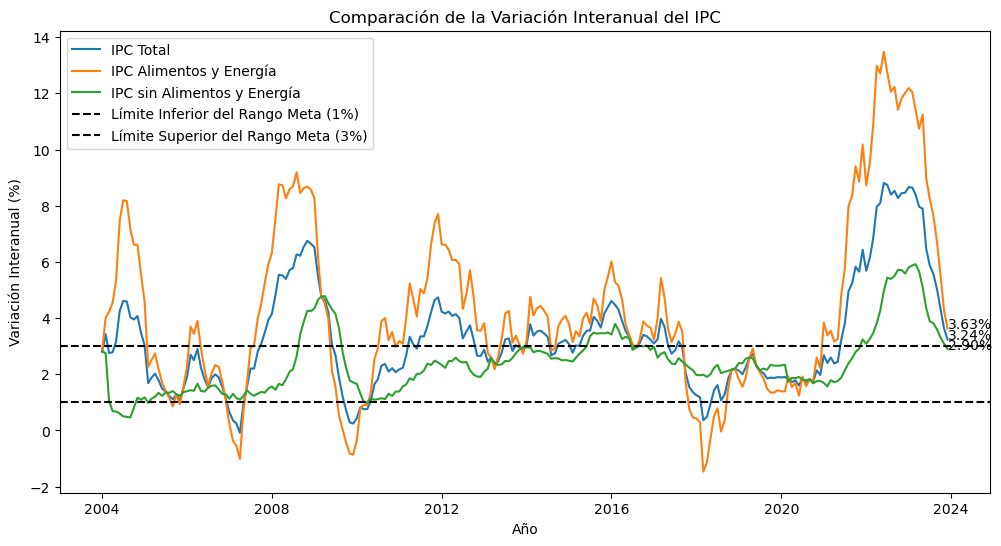

In [17]:
# Ahora crea la gráfica
plt.figure(figsize=(12, 6))

# Dibujar las series
plt.plot(IPC.index, IPC['variacion_interanual'], label='IPC Total')
plt.plot(IPC_AE.index, IPC_AE['variacion_interanual'], label='IPC Alimentos y Energía')
plt.plot(IPC_sin_AE.index, IPC_sin_AE['variacion_interanual'], label='IPC sin Alimentos y Energía')

# Obtener el último valor y la última fecha de cada serie
ultimo_valor_IPC = IPC['variacion_interanual'].iloc[-1]
fecha_final_IPC = IPC.index[-1]
ultimo_valor_IPC_AE = IPC_AE['variacion_interanual'].iloc[-1]
fecha_final_IPC_AE = IPC_AE.index[-1]
ultimo_valor_IPC_sin_AE = IPC_sin_AE['variacion_interanual'].iloc[-1]
fecha_final_IPC_sin_AE = IPC_sin_AE.index[-1]

# Colocar el texto con el último valor al final de cada serie
plt.text(fecha_final_IPC, ultimo_valor_IPC, f'{ultimo_valor_IPC:.2f}%')
plt.text(fecha_final_IPC_AE, ultimo_valor_IPC_AE, f'{ultimo_valor_IPC_AE:.2f}%')
plt.text(fecha_final_IPC_sin_AE, ultimo_valor_IPC_sin_AE, f'{ultimo_valor_IPC_sin_AE:.2f}%')

# Dibujar líneas horizontales para el rango meta de inflación (1% a 3%) en color negro
plt.axhline(y=1, color='k', linestyle='--', label='Límite Inferior del Rango Meta (1%)')
plt.axhline(y=3, color='k', linestyle='--', label='Límite Superior del Rango Meta (3%)')

plt.title('Comparación de la Variación Interanual del IPC')
plt.xlabel('Año')
plt.ylabel('Variación Interanual (%)')
plt.legend()
plt.show()


El gráfico muestra que las líneas de IPC están dentro del rango establecido a nivel de análisis histórico; por tanto, se podría inferir que, en promedio, la inflación se ha encontrado dentro del objetivo del banco central alrededor de los años. Este resultado demuestra un relativo éxito en la efectividad del regimen de política monetario implementado desde 2002 denomido como metas explícitas de inflación.

Es importante precisar que si las líneas se mueven por encima del límite superior, indica que la inflación está más alta de lo deseado, lo que podría requerir una política monetaria más restrictiva o hawkish (por ejemplo, aumentar las tasas de interés).

Si las líneas están por debajo del límite inferior, indica que la inflación está más baja de lo deseado, lo que podría requerir una política monetaria más expansiva o dovish (por ejemplo, reducir las tasas de interés).
En este sentido, el BCRP también usa un instrumento adicional como el forward looking en aras de potenciar el canal de transimisión de la tasa de interés e influenciar en las expactativas de inflación y tasas de interés de largo plazo.
Respecto al análisis gráfico, se observa que hubo picos significativos de inflación en torno a 2008, 2011, y un pico muy grande en 2022 que supera notablemente el rango meta, lo cual está relacionado con ciertos eventos internacionales ocurridos. También, se puede notar que, al final del gráfico, la inflación  se encuentra convergiendo nuevamente hacia el rango meta con la inflación subyacente (sin alimentos y energía) dentro del rango. 

Variación Interanual del IPC total y Expectativas de Inflación a 12 meses

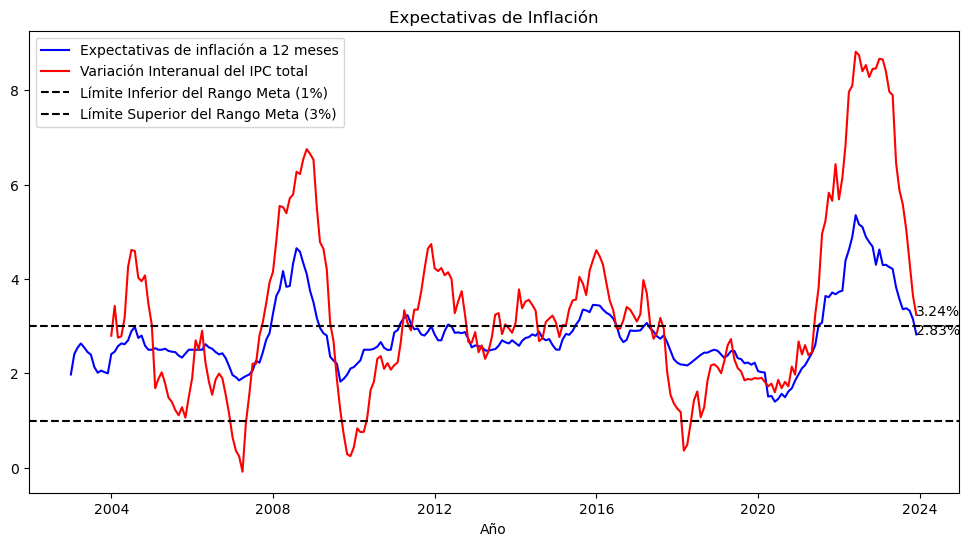

In [18]:
# Ahora crea la gráfica
plt.figure(figsize=(12, 6))

# Dibujar las series
plt.plot(exp_inf.index, exp_inf['indice'], label='Expectativas de inflación a 12 meses', color = 'b')
plt.plot(IPC.index, IPC['variacion_interanual'], label='Variación Interanual del IPC total',color = 'r')

# Obtener el último valor y la última fecha de cada serie
ultimo_valor_exp = exp_inf['indice'].iloc[-1]
fecha_final_exp = exp_inf.index[-1]
ultimo_valor_IPC = IPC['variacion_interanual'].iloc[-1]
fecha_final_IPC = IPC.index[-1]

# Colocar el texto con el último valor al final de cada serie
plt.text(fecha_final_exp, ultimo_valor_exp, f'{ultimo_valor_exp:.2f}%')
plt.text(fecha_final_IPC, ultimo_valor_IPC, f'{ultimo_valor_IPC:.2f}%')

# Dibujar líneas horizontales para el rango meta de inflación (1% a 3%) en color negro
plt.axhline(y=1, color='k', linestyle='--', label='Límite Inferior del Rango Meta (1%)')
plt.axhline(y=3, color='k', linestyle='--', label='Límite Superior del Rango Meta (3%)')

plt.title('Expectativas de Inflación')
plt.xlabel('Año')
plt.ylabel('')
plt.legend()
plt.show()

Resulto preciso especificar que cuando las expectativas de inflación se encuentran por encima de la tasa de inflación actual significa que los agentes económicos anticipan que habrá una presión al alza sobre los precios en el futuro. Si las expectativas de inflación están por debajo de la tasa de inflación, los agentes económicos esperan que la inflación se moder, lo cual podría afectar la trayectoria futura de la tasa de inflación.

A lo largo del período mostrado, se observa que las expectativas de inflación y variación del IPC fluctúan en el mismo sentido, lo cual sugiere una correlación positiva. Es decir, cuando en ciertos periodos como el 2008 o 2022, donde ocurrieron episodios adversos internacionales (la gran crisis financiera o la pandemia del COVID-19), la volatilidad del IPC se incrementó, al unísono, las expectativas de inflación también fueron impactadas positivamente. 

En el pico alrededor de 2022, las expectativas de inflación superan significativamente el límite superior del rango meta; además, la volatilidad del IPC también experimenta su mayor valor. Esto sugiere que hubo un período de alta inflación, que superó lo que el banco central considera óptimo y deseable.

Al final del gráfico, en 2024, las expectativas de inflación converjen dentro del límite superior del rango meta, mientras que la volatilidad del IPC también recae notablemente. Esto indica que los agentes económicos esperan que la inflación retorne al rango meta; además, ello expresa que la política monetaria está logrando estabilizar la tasa de inflación.

Volatilidad del IPC: total, con alimientos y energía y sin alimentos ni energía.

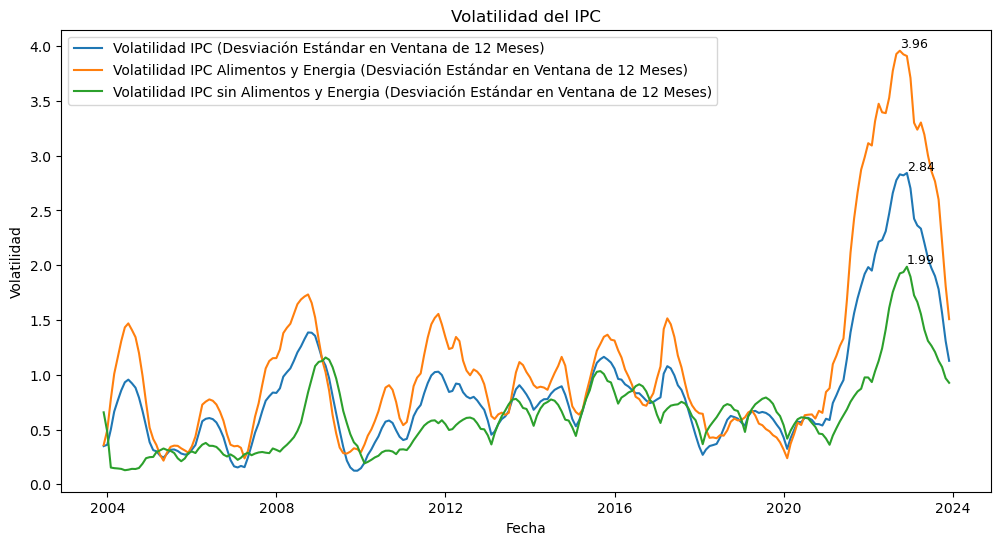

In [19]:
# Calcula la desviación estándar en una ventana móvil de 12 meses
IPC['volatilidad'] = IPC['indice'].rolling(window=12).std()
IPC_AE['volatilidad'] = IPC_AE['indice'].rolling(window=12).std()
IPC_sin_AE['volatilidad'] = IPC_sin_AE['indice'].rolling(window=12).std()

# Encuentra el valor máximo y su fecha para cada serie
max_valor_IPC = IPC['volatilidad'].max()
fecha_max_IPC = IPC['volatilidad'].idxmax()
max_valor_IPC_AE = IPC_AE['volatilidad'].max()
fecha_max_IPC_AE = IPC_AE['volatilidad'].idxmax()
max_valor_IPC_sin_AE = IPC_sin_AE['volatilidad'].max()
fecha_max_IPC_sin_AE = IPC_sin_AE['volatilidad'].idxmax()

# Grafica la volatilidad
plt.figure(figsize=(12, 6))
plt.plot(IPC.index, IPC['volatilidad'], label='Volatilidad IPC (Desviación Estándar en Ventana de 12 Meses)')
plt.plot(IPC_AE.index, IPC_AE['volatilidad'], label='Volatilidad IPC Alimentos y Energia (Desviación Estándar en Ventana de 12 Meses)')
plt.plot(IPC_sin_AE.index, IPC_sin_AE['volatilidad'], label='Volatilidad IPC sin Alimentos y Energia (Desviación Estándar en Ventana de 12 Meses)')

# Coloca el texto con el valor máximo en el gráfico
plt.text(fecha_max_IPC, max_valor_IPC, f'{max_valor_IPC:.2f}', fontsize=9, verticalalignment='bottom')
plt.text(fecha_max_IPC_AE, max_valor_IPC_AE, f'{max_valor_IPC_AE:.2f}', fontsize=9, verticalalignment='bottom')
plt.text(fecha_max_IPC_sin_AE, max_valor_IPC_sin_AE, f'{max_valor_IPC_sin_AE:.2f}', fontsize=9, verticalalignment='bottom')

plt.title('Volatilidad del IPC')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad')
plt.legend()
#plt.grid(True)
plt.show()

En el gráfico, se representan a las volatilidades del Índice de Precios al Consumidor (IPC) en sus distintas presentaciones calculadas como la desviación estándar en una ventana de 12 meses, lo cual proporciona una medida de cuánto varían los precios dentro de un año. 

La volatilidad del IPC Alimentos y Energía tiende a ser más alta que la del IPC total y la del IPC sin alimentos y energía. Esto es consistente con el argumento de que los precios de los alimentos y la energía son más susceptibles a los choques externos como un incremento de los precios de los alimentos y energía, lo cual acarrea que fluctúen en mayor medida que los demás índices.

Las picos de volatilidad en la línea naranja (IPC Alimentos y Energía) son significativamente más altos, lo que indica periodos de mayor incertidumbre en los precios de estos bienes. Por ejemplo, el pico más alto ocurrido alrededor de 2020-2021 podría estar relacionado con eventos como la pandemia de COVID-19, que afectó significativamente a las cadenas de suministro globales y los precios de la energía.

La línea verde (IPC sin Alimentos y Energía) es generalmente más estable en términos relativos, lo que sugiere que la inflación subyacente, que no incluye los precios de alimentos y energía, no experimenta fluctuaciones tan extremas al ser afectada por eventos domésticos como una mayor brecha producto, que indicaría un sobrecalentamiento de la economía.

En aquellos periodos en los que las líneas azul (IPC Total) y verde (IPC sin Alimentos y Energía) evolucionan de manera conjunta, mientras que la línea naranja (IPC Alimentos y Energía) se aparta significativamente, es posible inferir que las variaciones en los precios están siendo impulsadas principalmente por cambios en los costos de alimentos y energía. Estos comportamientos pueden estar vinculados a eventos internacionales, como la guerra de Rusia contra Ucrania, períodos de sequía u otros eventos similares que impactan directamente en los precios de estos últimos elementos.

En la parte final del gráfico, específicamente en 2022, se observa un aumento dramático en la volatilidad de los precios de alimentos y energía, mientras que la volatilidad del IPC total y del IPC sin alimentos y energía también experimenta un incremento, aunque en menor medida. Este fenómeno sugiere un período de inestabilidad en los precios, posiblemente atribuible a eventos globales, crisis en el suministro, o cambios políticos significativos.

Tasa de referencia de Política Monetaria y la volatilidad del IPC total

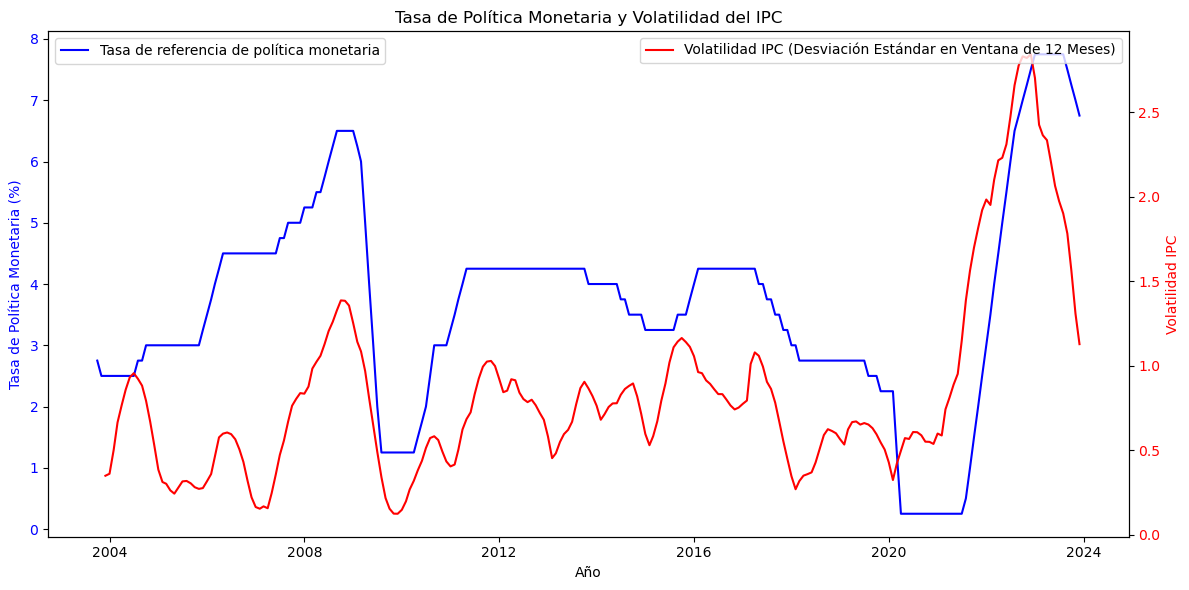

In [20]:
# Crear la figura y el eje principal
fig, ax1 = plt.subplots(figsize=(12, 6))

# Dibujar la serie de la Tasa de Política Monetaria en el eje principal (izquierdo)
ax1.plot(t_r.index, t_r['indice'], label='Tasa de referencia de política monetaria', color='b')
ax1.set_xlabel('Año')
ax1.set_ylabel('Tasa de Política Monetaria (%)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Crear un segundo eje para la volatilidad del IPC
ax2 = ax1.twinx()  
ax2.plot(IPC.index, IPC['volatilidad'], label='Volatilidad IPC (Desviación Estándar en Ventana de 12 Meses)', color='r')
ax2.set_ylabel('Volatilidad IPC', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Título y leyenda
plt.title('Tasa de Política Monetaria y Volatilidad del IPC')
fig.tight_layout()  # Ajusta el layout para evitar solapamientos

# Mostrar la leyenda
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

Este gráfico ilustra la evolución de la tasa de política monetaria y la volatilidad del Índice de Precios al Consumidor (IPC) a lo largo del periodo comprendido entre 2004 y 2023.

La línea azul representa la tasa de referencia de política monetaria, una herramienta fundamental empleada por el banco central para influir en la actividad económica y la inflación. Por lo general, una tasa más elevada se utiliza para enfriar la economía y así controlar la inflación, mientras que una tasa más baja se implementa para estimular la actividad económica y estabilizar a la inflación.

La línea roja representa la volatilidad del IPC, calculada como la desviación estándar en una ventana de 12 meses. La volatilidad del IPC puede interpretarse como un indicador de la incertidumbre económica y de la efectividad de la política monetaria en el mantenimiento de la estabilidad de precios.

Es evidente una correlación positiva entre la volatilidad del IPC y la tasa de referencia de política monetaria, lo que sugiere una posible relación directa entre ambas variables. Esto podría indicar que, al determinar la tasa de interés de política, se tiene en cuenta la volatilidad de la inflación como parte integral del proceso decisional.

Tasa de Referencia de Política Monetaria - Tasa de Inflación interanual - Volatilidad del IPC total

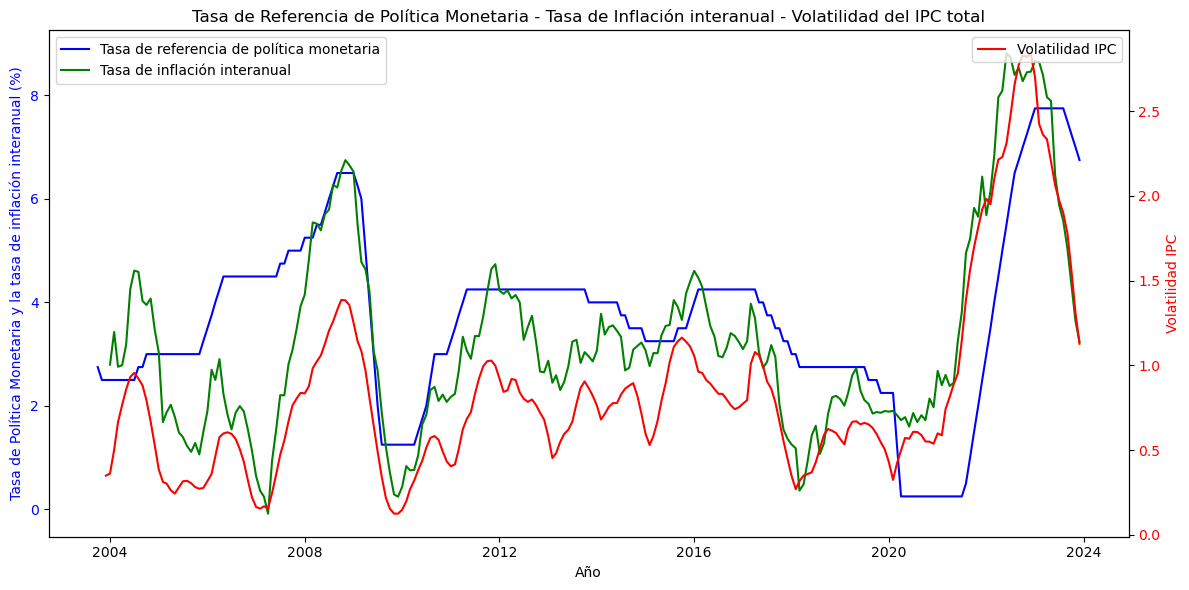

In [21]:
# Crear la figura y el eje principal
fig, ax1 = plt.subplots(figsize=(12, 6))

# Dibujar la serie de la Tasa de Política Monetaria en el eje principal (izquierdo)
ax1.plot(t_r.index, t_r['indice'], label='Tasa de referencia de política monetaria', color='b')
ax1.set_xlabel('Año')
ax1.set_ylabel('Tasa de Política Monetaria y la tasa de inflación interanual (%)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.plot(IPC.index, IPC['variacion_interanual'], label='Tasa de inflación interanual', color='g')
#ax1.set_ylabel('Tasa de inflación', color='g')

# Crear un segundo eje para la volatilidad del IPC
ax2 = ax1.twinx()  
ax2.plot(IPC.index, IPC['volatilidad'], label='Volatilidad IPC', color='r')
ax2.set_ylabel('Volatilidad IPC', color='r')
ax2.tick_params(axis='y', labelcolor='r')


# Título y leyenda
plt.title('Tasa de Referencia de Política Monetaria - Tasa de Inflación interanual - Volatilidad del IPC total')
fig.tight_layout()  # Ajusta el layout para evitar solapamientos

# Mostrar la leyenda
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

Volatilidad del PBI desestacionalizado (2007 = 100)

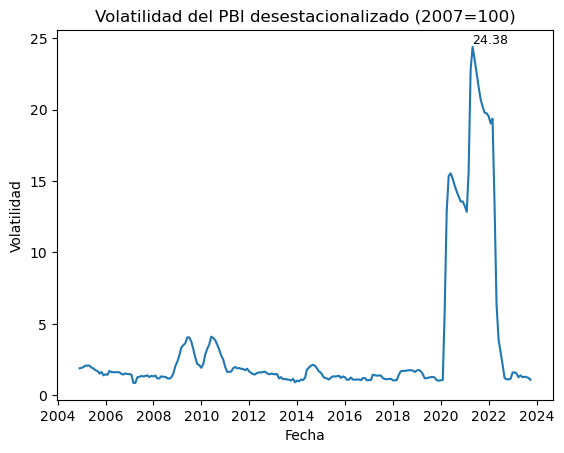

In [22]:
gdp['volatilidad'] = gdp['variacion_interanual'].rolling(window=12).std()
max_valor_gdp = gdp['volatilidad'].max()
fecha_max_gdp = gdp['volatilidad'].idxmax()
plt.plot(gdp.index, gdp['volatilidad'], label='Volatilidad del PBI desestacionalizado (Desviación Estándar en Ventana de 12 Meses)')
plt.text(fecha_max_gdp, max_valor_gdp, f'{max_valor_gdp:.2f}', fontsize=9, verticalalignment='bottom')
plt.title('Volatilidad del PBI desestacionalizado (2007=100)')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad')
#plt.legend()
#plt.grid(True)
plt.show()

In [23]:
# SERIES A EXCEL
IPC.to_excel('IPC.xlsx')  # Exportar a Excel
IPC_AE.to_excel('IPC_AE.xlsx')
IPC_sin_AE.to_excel('IPC_sin_AE.xlsx')

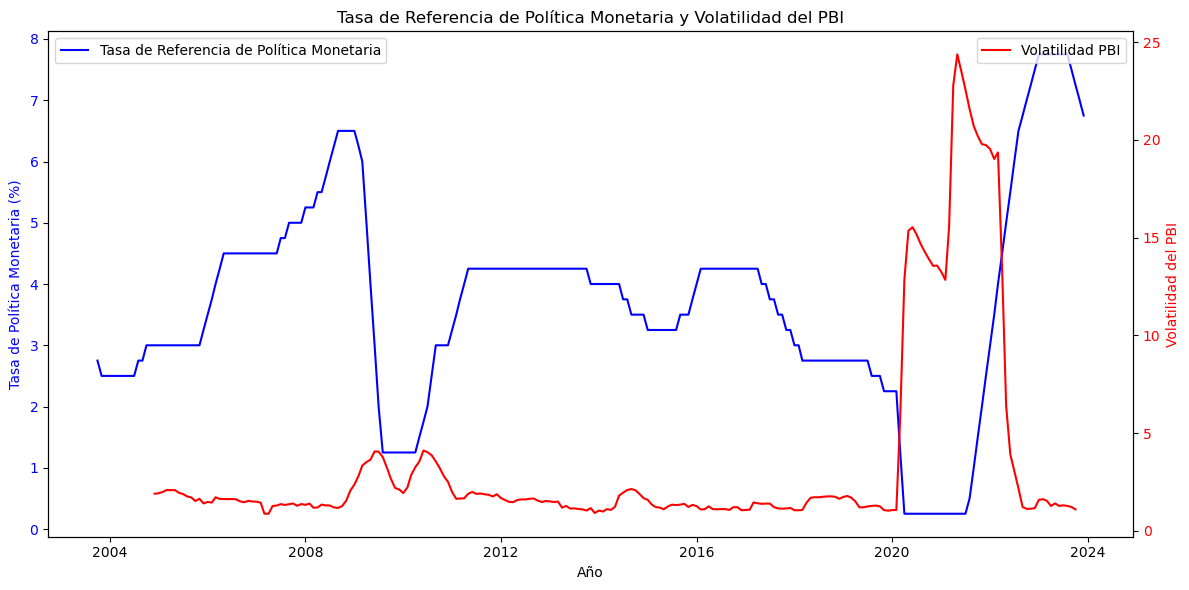

In [24]:
# Crear la figura y el eje principal
fig, ax1 = plt.subplots(figsize=(12, 6))

# Dibujar la serie de la Tasa de Política Monetaria en el eje principal (izquierdo)
ax1.plot(t_r.index, t_r['indice'], label='Tasa de Referencia de Política Monetaria', color='b')
ax1.set_xlabel('Año')
ax1.set_ylabel('Tasa de Política Monetaria (%)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
#ax1.plot(gdp.index, gdp['variacion_interanual'], label='Var del PBI', color='g')
#ax1.set_ylabel('Tasa de inflación', color='g')

# Crear un segundo eje para la volatilidad del IPC
ax2 = ax1.twinx()  
ax2.plot(gdp.index, gdp['volatilidad'], label='Volatilidad PBI', color='r')
ax2.set_ylabel('Volatilidad del PBI', color='r')
ax2.tick_params(axis='y', labelcolor='r')


# Título y leyenda
plt.title('Tasa de Referencia de Política Monetaria y Volatilidad del PBI')
fig.tight_layout()  # Ajusta el layout para evitar solapamientos

# Mostrar la leyenda
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

La tasa de referencia de política monetaria exhibe notables cambios a lo largo del tiempo, reflejando las decisiones del banco central en respuesta a diversas condiciones económicas.

La volatilidad del Producto Interno Bruto (PBI) se mantiene relativamente baja y estable desde 2004 hasta alrededor de 2020, indicando un período de crecimiento económico predecible y estable, así como una tasa de inflación controlada.

No obstante, se observa un pico abrupto en la volatilidad del PBI alrededor de 2020, probablemente asociado a la crisis económica mundial desencadenada por la pandemia de COVID-19. Este evento generó incertidumbre y fluctuaciones en el crecimiento económico, como se refleja en el marcado aumento de la volatilidad.

Durante el período de alta volatilidad del PBI, la tasa de referencia de política monetaria experimenta una marcada disminución, coherente con una estrategia de política monetaria expansiva diseñada para estimular la economía en momentos de crisis.

Al final del gráfico, parece haber una disminución en la tasa de referencia de política monetaria, sugiriendo una respuesta al abrupto incremento de la volatilidad del PBI, y un intento por estabilizar la economía y fomentar el crecimiento en el periodo posterior a la crisis.

# Segunda Parte Del Trabajo: NLP

In [26]:
import spacy
nlp = spacy.load("es_core_news_sm")


In [28]:
import os
import fitz
import spacy
from spacy.lang.es import Spanish
from datetime import datetime
import re
import locale


In [29]:
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

def extraer_texto_pdf(archivo_pdf):
    try:
        with fitz.open(archivo_pdf) as pdf_doc:
            texto = ''
            num_paginas = pdf_doc.page_count
            for pagina_num in range(num_paginas):
                texto += pdf_doc.load_page(pagina_num).get_text()
            return texto
    except Exception as e:
        print(f"Error al procesar el PDF {archivo_pdf}: {str(e)}")
        return None

def extraer_articulos(texto):
    # Cargar el modelo de lenguaje en español de spaCy
    nlp = spacy.load("es_core_news_sm")

    # Agregar el componente 'sentencizer' al pipeline de spaCy
    sentencizer = nlp.add_pipe("sentencizer")

    # Procesar el texto con spaCy
    doc = nlp(texto)

    # Identificar oraciones que podrían representar artículos
    articulos = [oracion.text for oracion in doc.sents if len(oracion.text.split()) > 5]

    return articulos

##############################################################################################

def extraer_fecha(texto):
    # Intentar encontrar la fecha en diferentes formatos
    formatos_fecha = [
        r'\b\d{1,2}\s+de\s+(?:ene(?:ro)?|feb(?:rero)?|mar(?:zo)?|abr(?:il)?|may(?:o)?|jun(?:io)?|jul(?:io)?|ago(?:sto)?|sep(?:tiembre)?|oct(?:ubre|ubre)?|nov(?:iembre)?|dic(?:iembre)?)\s+de\s+\d{4}\b',
        r'\b\d{1,2}\s+/\s+\d{1,2}\s+/\s+\d{4}\b',
        r'\b\d{1,2}\s+/\s+\d{1,2}\s+/\s+\d{2}\b'
    ]

    for formato in formatos_fecha:
        fecha_encontrada = re.search(formato, texto)
        if fecha_encontrada:
            fecha_encontrada = fecha_encontrada.group(0)
            break

    if fecha_encontrada:
        # Convertir la cadena de fecha a un objeto de fecha
        fecha_objeto = datetime.strptime(fecha_encontrada, '%d de %B de %Y')
        
        # Devolver la fecha en el formato deseado (YYYY-MM-DD)
        return fecha_objeto.strftime('%Y-%m-%d')
    else:
        return None
    
##############################################################################################
    
def analizar_tono_monetario(texto):
    palabras_clave_hawkish = ["aumento", "elevar la tasa", "restricción", "ajuste al alza", "por encima", "incremento de la tasa de inflación", "elevaron", "existen riesgos asociados a factores climáticos",
                              "continúan ubicándose por encima del límite", "por encima del límite superior", "riesgo global por los efectos de los conflictos internacionales", "superiores a las metas de inflación", "no necesariamente implica el fin del ciclo de alzas", 
                              "economía mejoraron", "incertidumbre de presiones al alza en los precios de commodities energéticos", "efectos macroeconómicos de los acontecimientos sociales recientes", "tasa de inflación sin alimentos y energía a doce meses aumentó",
                              "incremento de las tasas de inflación", "tasa de inflación a doce meses se elevó", "indicadores adelantados y de expectativas sobre la economía se recuperó", "alzas significativas de los precios internacionales de insumos alimenticios y combustibles",
                              "cuellos de botella de la oferta global de bienes y servicios", "expectativas de inflación a doce meses se elevaron", "por encima del rango meta", "alzas significativas de los precios internacionales de insumos",
                              "tasa de inflación sin alimentos y energía a doce meses también se elevó", "persistencia en el alza de precios internacionales de energía y alimentos", "tasa de inflación a doce meses se incrementó", "conveniente proseguir con la normalización",
                              "incremento de los precios internacionales de insumos", "por encima del rango", "expectativas de inflación a doce meses se incrementaron", "tasa de inflación a doce meses se incrementó", "indicadores de expectativas sobre la economía ha mejorado", "retiro gradual del estímulo monetario",
                              "expectativas de inflación a doce meses aumentaron", "actividad mostraron una recuperación", "optimista", "actividad continuaron recuperándose", " mejora de la actividad", "crecimiento del PBI continuaron", "mejora importante de la actividad", "expectativas empresariales se recuperaron",
                              "signos de dinamismo", "empresariales han mejorado"]
    palabras_clave_dovish = ["disminución","reducir", "estímulo", "expansión", "ajuste a la baja", "reducción de inflación", "trayectoria decreciente", "moderación", "Ambos indicadores vienen disminuyendo", 
                             "dentro del rango", "alcance el rango", "alcanzando el rango", "expectativas de inflación a doce meses se redujeron", "tendencia decreciente", "disipan algunos de los efectos transitorios en la inflación", 
                             " tramo pesimista", "ubicándose cerca al límite superior", "efectos transitorios en la inflación", "ubicándose cerca al rango", "alcanzando dicho rango", "reversión de choques de oferta", "reducción de las expectativas de inflación",
                             "retorno al rango meta", "moderación del efecto de los precios internacionales de alimentos y energía", "tasa de inflación a doce meses se redujo", "inflación retornaría al rango",
                             "indicadores adelantados y de expectativas sobre la economía se deterioraron", "por debajo de su nivel potencial", "reversión del efecto de diversos factores sobre la tasa de inflación",
                             "economía se deterioraron", "transitoriamente por encima del rango", "reversión del efecto de factores transitorios sobre la tasa de inflación", 
                             "no implica necesariamente un ciclo de alzas", "inflación retornará al rango", "la tasa de inflación a doce meses se redujo", "sostener el sistema de pagos y el flujo de créditos", "atenuar dichas volatilidades",
                             "tasa de interés de referencia históricamente baja", "mantendrá luego en dicho rango","ligeratamente", "inflación se ubican en el rango",
                             "expectativas sobre la economía se deterioraron", "se mantiene en mínimos históricos", "se ubican alrededor del centro del rango", "inyección de liquidez", "tasa de interés real de política monetaria continuó disminuyendo",
                             "apropiado mantener una postura expansiva", "inyección del BCRP", "tramo inferior", "mantendrá en el rango", "tramo inferior del rango", "expectativas empresariales indican un deterioro", "expansiva por un período prolongado",
                             "por factores puntuales de oferta", "inflación se mantendrá en el rango", "crecimiento del PBI se deterioraron", "ubicaría en el centro de rango", "reducción significativa de las tasas", "Expansión del Crédito a Largo Plazo",
                             "se mantienen significativamente por debajo", "debilitamiento significativo de la demanda","continuar con su política monetaria expansiva", "ubicaría por debajo del rango", "recesión global", "actividad económica ha sido severamente afectada", "económica viene siendo severamente afectada",
                             "reducciones en la tasa de interés", "menores tasas de interés", "reducir considerablemente las tasas", "recesión económica", "ampliando el estímulo", "defender la estabilidad macrofinanciera", "empleo", "actividad productiva", "sesgo a la baja", "demanda interna menor", "desempeño negativo", "precios internacionales de energía es aún incierto",
                             "factores transitorios", "inflación del mes hubiera sido negativa", "sectores primarios tuvo un desempeño negativo", "menor ejecución", "alta volatilidad en los mercados financieros", "estímulo monetario", "menor dinamismo", "débil desempeño"]
    palabras_clave_neutral = ["condicionados a nueva información","no necesariamente implica", "considerar, de ser necesario, modificaciones adicionales", "adoptar las acciones necesarias para asegurar el retorno de la inflación", "mantener la tasa",
                              "asegurar el retorno de la inflación", "conflictos internacionales", "continuando con la normalización de la posición", "se encuentra especialmente atento", "se ubique alrededor de 2,0", "tasa interanual se mantuvo", "evaluar ajustes a la posición", "inflación a doce meses se mantienen", "a doce meses se mantiene", "tensiones comerciales se han atenuado",
                              "dentro del rango", "mantienen los riesgos", " moderado dinamismo", "expectativas de inflación permanezcan ancladas", "menor volatilidad", "cierre gradual de la brecha", "mantenga en el rango"]
    
    conteo_hawkish = sum(texto.lower().count(palabra) for palabra in palabras_clave_hawkish)
    conteo_dovish = sum(texto.lower().count(palabra) for palabra in palabras_clave_dovish)
    conteo_neutral = sum(texto.lower().count(palabra) for palabra in palabras_clave_neutral)
    

    if conteo_hawkish > conteo_dovish and conteo_hawkish > conteo_neutral:
        return "Hawkish"
    elif conteo_dovish > conteo_hawkish and conteo_dovish > conteo_neutral:
        return "Dovish"
    else:
        return "Neutral"
####################################################################################################

In [31]:
# Ruta de la carpeta que contiene los archivos PDF
carpeta_pdf = '/Users/patriciajacquelinemendozaarce/Downloads/proyecto-final-remon_mendoza_proyectofinal/Notas_informativas'

# Obtener la lista de archivos en la carpeta
archivos_en_carpeta = [os.path.join(carpeta_pdf, archivo) for archivo in os.listdir(carpeta_pdf) if archivo.endswith('.pdf')]

resultados_tonos = {}


for ruta_pdf in archivos_en_carpeta:
    # Extraer texto del PDF
    texto_pdf = extraer_texto_pdf(ruta_pdf)

    if texto_pdf:
        # Extraer artículos
        articulos_extraidos = extraer_articulos(texto_pdf)

        # Unir todos los fragmentos de texto en uno solo
        texto_completo = '\n'.join(articulo for articulo in articulos_extraidos)

        # Analizar el tono monetario
        tono_monetario = analizar_tono_monetario(texto_completo)

        # Extraer la fecha de la última oración
        fecha_ultima_oracion = extraer_fecha(texto_completo)

        #Extraer el indicador tono
        #tone = indicador_tonet_c(texto_completo)

        # Almacenar resultado en el contenedor
        resultados_tonos[fecha_ultima_oracion] = tono_monetario
       
        # Imprimir resultado
        print(f"El tono monetario de la nota informativa {fecha_ultima_oracion} es: {tono_monetario}")
    else:
        print(f"No se pudo extraer texto de la nota informativa {ruta_pdf}.")

# Imprimir resultados finales
print("\nResultados finales:")
for ruta, tono in resultados_tonos.items():
    print(f"PDF: {ruta} | Tono monetario: {tono}")

El tono monetario de la nota informativa 2021-10-07 es: Neutral
El tono monetario de la nota informativa 2017-08-10 es: Dovish
El tono monetario de la nota informativa 2021-11-11 es: Hawkish
El tono monetario de la nota informativa 2020-04-16 es: Dovish
El tono monetario de la nota informativa 2018-08-09 es: Neutral
El tono monetario de la nota informativa 2023-07-13 es: Dovish
El tono monetario de la nota informativa 2019-06-13 es: Neutral
El tono monetario de la nota informativa 2017-07-13 es: Neutral
El tono monetario de la nota informativa 2018-02-08 es: Dovish
El tono monetario de la nota informativa 2020-02-13 es: Neutral
El tono monetario de la nota informativa 2022-03-11 es: Hawkish
El tono monetario de la nota informativa 2022-08-11 es: Hawkish
El tono monetario de la nota informativa 2021-05-13 es: Dovish
El tono monetario de la nota informativa 2020-07-09 es: Dovish
El tono monetario de la nota informativa 2023-02-09 es: Hawkish
El tono monetario de la nota informativa 2022-

In [32]:
resultados_tonos = dict(sorted(resultados_tonos.items()))
# Convertir el diccionario a DataFrame
resultados_tonos = pd.DataFrame(list(resultados_tonos.items()), columns=['Fecha', 'Tono'])


In [33]:
# Diccionario para asignar valores
valor_por_tono = {'Hawkish': 1, 'Dovish': -1, 'Neutral': 0}

# Agregar una nueva columna con los valores correspondientes
resultados_tonos['Valor'] = resultados_tonos['Tono'].map(valor_por_tono)

# Mostrar el DataFrame con la nueva columna de valores
print(resultados_tonos)

         Fecha     Tono  Valor
0   2017-02-09  Neutral      0
1   2017-03-09  Neutral      0
2   2017-04-06  Neutral      0
3   2017-05-11  Neutral      0
4   2017-06-08  Neutral      0
..         ...      ...    ...
64  2023-08-10   Dovish     -1
65  2023-10-05   Dovish     -1
66  2023-11-09   Dovish     -1
67  2023-12-14   Dovish     -1
68  2024-02-08   Dovish     -1

[69 rows x 3 columns]


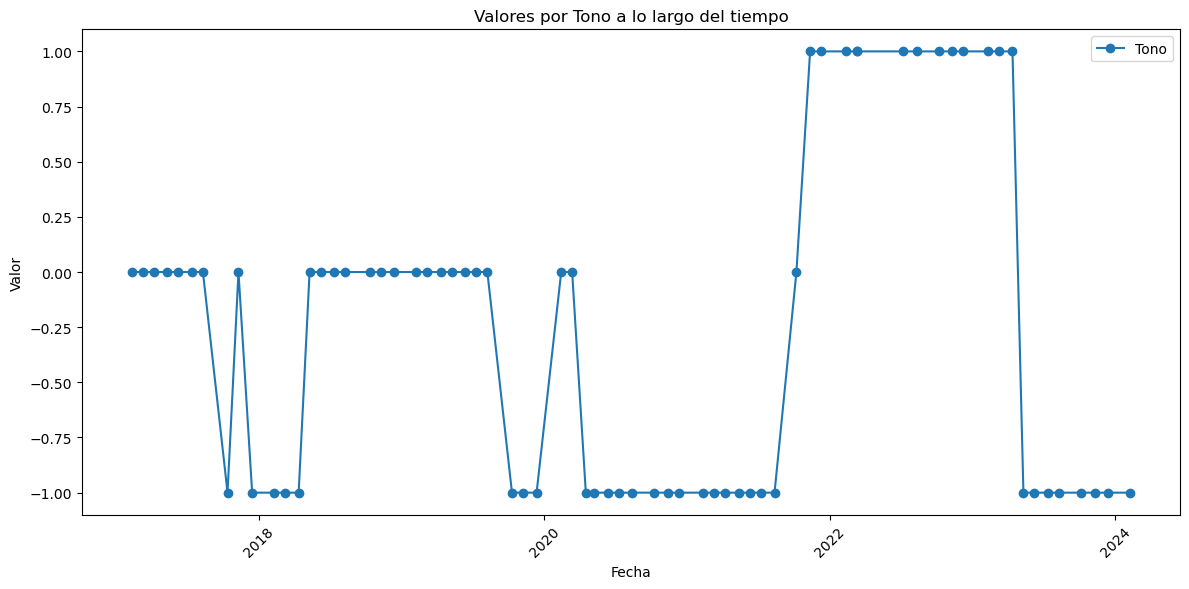

In [34]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convertir las fechas a formato datetime
resultados_tonos['Fecha'] = pd.to_datetime(resultados_tonos['Fecha'])

# Graficar el DataFrame
plt.figure(figsize=(12, 6))

# Graficar todos los valores juntos
plt.plot(resultados_tonos['Fecha'], resultados_tonos['Valor'], marker='o', linestyle='-', label='Tono')

# Configurar la leyenda y etiquetas
plt.legend()
plt.title('Valores por Tono a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')

# Formatear las fechas en el eje x para mostrar solo cada 5 años
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))

# Rotar las fechas para mejor visualización
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


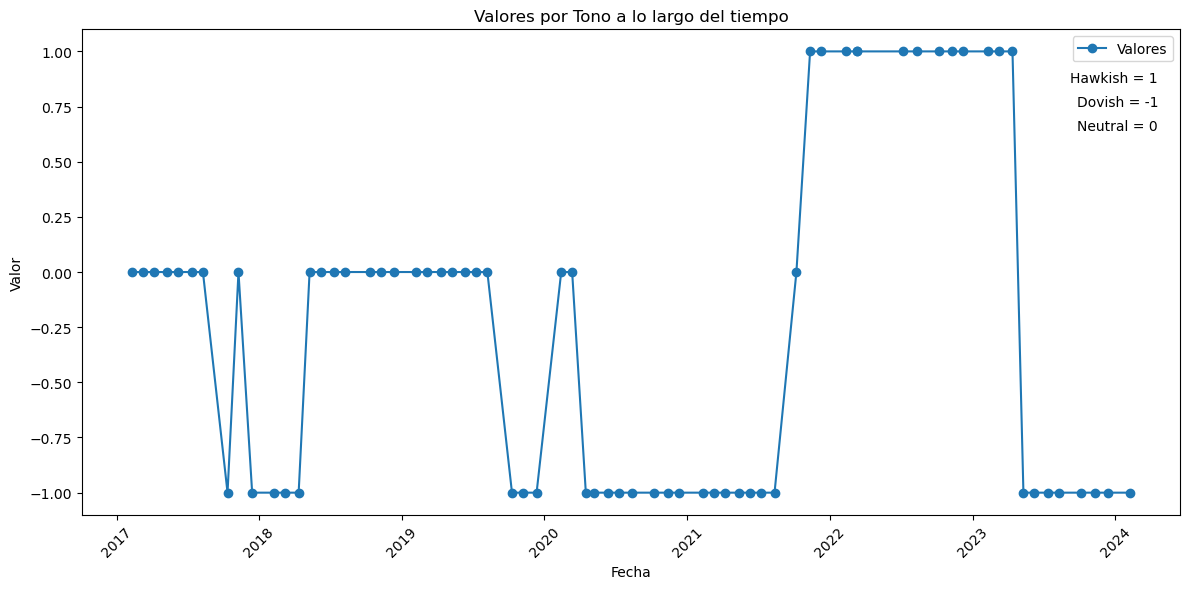

In [35]:
# Convertir las fechas a formato datetime
resultados_tonos['Fecha'] = pd.to_datetime(resultados_tonos['Fecha'])

# Graficar el DataFrame
plt.figure(figsize=(12, 6))

# Graficar todos los valores juntos
plt.plot(resultados_tonos['Fecha'], resultados_tonos['Valor'], marker='o', linestyle='-', label='Valores')

# Configurar la leyenda y etiquetas
plt.legend()

# Agregar leyenda adicional para los tonos
plt.text(0.98, 0.9, 'Hawkish = 1', horizontalalignment='right', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.98, 0.85, 'Dovish = -1', horizontalalignment='right', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.98, 0.8, 'Neutral = 0', horizontalalignment='right', verticalalignment='center', transform=plt.gca().transAxes)

plt.title('Valores por Tono a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')

# Formatear las fechas en el eje x para mostrar solo cada 5 años
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))

# Rotar las fechas para mejor visualización
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

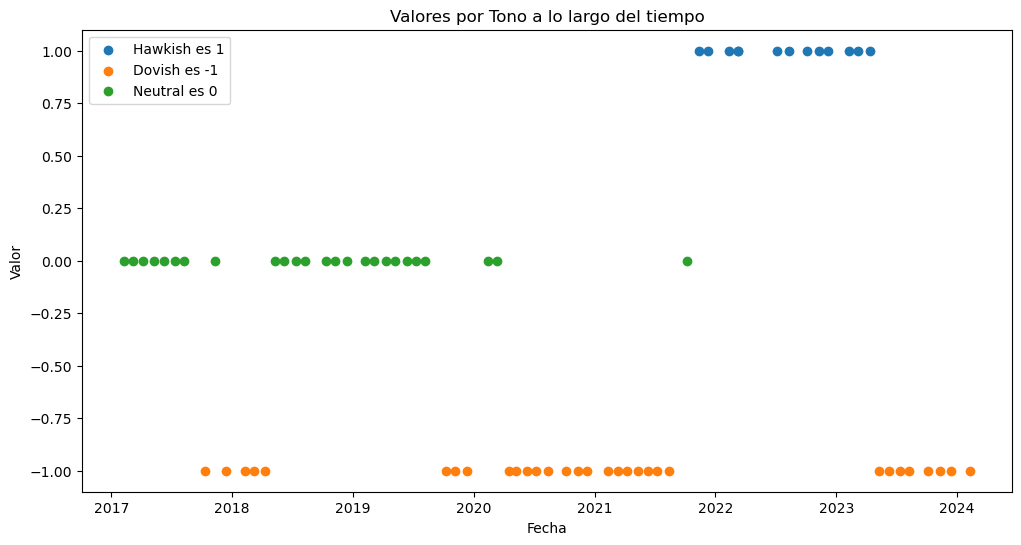

In [36]:
import matplotlib.pyplot as plt

# Graficar el DataFrame
plt.figure(figsize=(12, 6))

# Separar por tono y graficar cada uno
for tono, valor in valor_por_tono.items():
    datos_tono = resultados_tonos[resultados_tonos['Tono'] == tono]
    plt.scatter(datos_tono['Fecha'], datos_tono['Valor'], label=f'{tono} es {valor}')

# Configurar la leyenda y etiquetas
plt.legend()
plt.title('Valores por Tono a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')

# Mostrar la gráfica
plt.show()

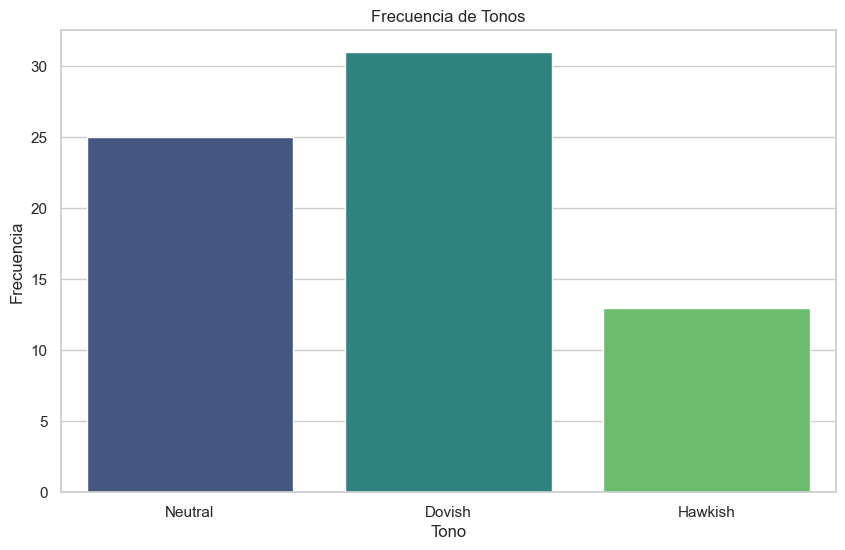

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que la columna 'Fecha' esté en formato datetime
resultados_tonos['Fecha'] = pd.to_datetime(resultados_tonos['Fecha'])

# Configuración del estilo de las gráficas con seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='Tono', data=resultados_tonos, palette='viridis')
plt.title('Frecuencia de Tonos')
plt.xlabel('Tono')
plt.ylabel('Frecuencia')
plt.show()

 El análisis de sentimiento muestran que durante períodos de alta volatilidad del IPC (indicativo de inflación inestable), es posible que veamos un tono más "hawkish" en las declaraciones de política monetaria del banco central, reflejado en un aumento en la tasa de referencia. Esto podría ser lo que sucedió alrededor de 2022, donde el gráfico de sentimientos de política monetaria muestra un pico "hawkish" y el segundo gráfico muestra un aumento en la volatilidad del IPC, que luego es seguido por un aumento en la tasa de política monetaria.
En contraste, cuando la volatilidad del IPC es baja, lo que sugiere una inflación más estable y predecible, es posible que el banco central adopte un tono más "dovish", que podría estar acompañado de una disminución en la tasa de política monetaria para estimular la economía. Esto podría corresponder a los valores más bajos y neutrales vistos en el primer gráfico hacia finales de 2023, que también coinciden con una disminución en la volatilidad del IPC y en la tasa de referencia de política monetaria en el segundo gráfico.
Finalmente, las decisiones de política monetaria y las comunicaciones del banco central son reactivas a las condiciones económicas y proactivas en sus intentos de estabilizar la economía y la inflación. Por lo tanto, la correlación entre el tono de las comunicaciones, la volatilidad del IPC y las tasas de política monetaria no es coincidencia, sino que refleja la interacción dinámica entre la política monetaria y las condiciones económicas.
